In [1]:
# Benchmarking PBMC dataset with simulated CNVs
# - CD14 monocytes: Chr6 loss, Chr22 loss
# - CD4 T cells: ChrX gain

adfile_path = "/Users/pythonpete/Downloads/CSCB-2025-Final/data/iPSC_annotated.h5ad"

In [2]:
from cscb_methods import *

In [3]:
# Read file
adata = sc.read_h5ad(adfile_path)

In [4]:
#adata.var["start"] = np.NAN
#adata.var["end"] = np.NAN
#adata.var["chromosome"] = np.NAN
adata.var.columns = ["gene_ids"] + list(adata.var.columns[1:])
adata.var

,gene_ids,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
MIR1302-2HG,ENSG00000243485,False,False,4,0.000342,99.965824,4,4,False,6.034200e-04,0.508579,-0.970661
FAM138A,ENSG00000237613,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN
OR4F5,ENSG00000186092,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN
AL627309.1,ENSG00000238009,False,False,19,0.001709,99.837662,20,16,False,2.449660e-03,0.908249,-0.177166
AL627309.3,ENSG00000239945,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,ENSG00000277856,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN
AC233755.1,ENSG00000275063,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN
AC240274.1,ENSG00000271254,False,False,73,0.006835,99.376282,80,64,False,1.111930e-02,0.902890,-0.187806
AC213203.4,ENSG00000277475,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN


In [5]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype
barcode,,,,,,,,,,
AACACACAGAACGTCCAAACCAATCCG,2388,5707,630,11.039075,908,15.910286,2388,5707,0,iPSC
AACACACAGAACGTCCAACTTCAGTCT,2451,5962,482,8.084535,905,15.179470,2451,5962,0,iPSC
AACACACAGAACGTCCAAGTACGGACT,2203,5180,489,9.440154,805,15.540541,2203,5180,0,iPSC
AACACACAGAATCCGGTGACGTGTGTT,712,982,2,0.203666,122,12.423625,712,982,1,HSPC
AACACACAGAATCCGGTGCCAATACAG,1582,2992,9,0.300802,526,17.580214,1582,2992,1,HSPC
...,...,...,...,...,...,...,...,...,...,...
TGTGGACACTTACACGACTGACAGCTA,2529,5737,554,9.656615,782,13.630818,2529,5737,0,iPSC
TGTGGACACTTGCCGTCACCAAGGATG,2116,4523,603,13.331859,501,11.076719,2116,4523,0,iPSC
TGTGGACACTTGCCGTCATGCTATCGC,2525,6091,630,10.343129,766,12.575932,2525,6091,0,iPSC


In [6]:
ref = "/Users/pythonpete/Downloads/PBMC_simulated_cnas_041025.h5ad"
ref_ad = sc.read_h5ad(ref)
ref_ad

AnnData object with n_obs × n_vars = 10309 × 20104
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'cell_type', 'simulated_cnvs'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'chromosome', 'start', 'end', 'strand'
    layers: 'counts'

In [7]:
ref_pos = ref_ad.var.loc[:, ["gene_ids", "chromosome", "start", "end", "strand"]]
ref_pos

,gene_ids,chromosome,start,end,strand
original_index,,,,,
AL627309.1,ENSG00000238009,NaN,NaN,NaN,NaN
AL627309.3,ENSG00000239945,1,89551.0,91105.0,-1.0
AL669831.5,ENSG00000237491,1,778739.0,810066.0,1.0
FAM87B,ENSG00000177757,1,817363.0,819842.0,1.0
LINC00115,ENSG00000225880,1,586945.0,827989.0,-1.0
...,...,...,...,...,...
AC011043.1,ENSG00000276256,GL000195.1,42939.0,49164.0,-1.0
AL592183.1,ENSG00000273748,GL000219.1,54224.0,83311.0,-1.0
AC007325.4,ENSG00000278817,KI270734.1,131494.0,137392.0,1.0


In [8]:
pos_overlap = pd.merge(adata.var, ref_pos, on="gene_ids", how="left")
pos_overlap

,gene_ids,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,chromosome,start,end,strand
0,ENSG00000243485,False,False,4,0.000342,99.965824,4,4,False,6.034200e-04,0.508579,-0.970661,NaN,NaN,NaN,NaN
1,ENSG00000237613,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSG00000186092,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
3,ENSG00000238009,False,False,19,0.001709,99.837662,20,16,False,2.449660e-03,0.908249,-0.177166,NaN,NaN,NaN,NaN
4,ENSG00000239945,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN,1,89551.0,91105.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37488,ENSG00000277856,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
37489,ENSG00000275063,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
37490,ENSG00000271254,False,False,73,0.006835,99.376282,80,64,False,1.111930e-02,0.902890,-0.187806,HG1343_HG173_HG459_PATCH,1011165.0,1078120.0,1.0
37491,ENSG00000277475,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
adata.var = pos_overlap
adata.var

,gene_ids,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,chromosome,start,end,strand
0,ENSG00000243485,False,False,4,0.000342,99.965824,4,4,False,6.034200e-04,0.508579,-0.970661,NaN,NaN,NaN,NaN
1,ENSG00000237613,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSG00000186092,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
3,ENSG00000238009,False,False,19,0.001709,99.837662,20,16,False,2.449660e-03,0.908249,-0.177166,NaN,NaN,NaN,NaN
4,ENSG00000239945,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN,1,89551.0,91105.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37488,ENSG00000277856,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
37489,ENSG00000275063,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN
37490,ENSG00000271254,False,False,73,0.006835,99.376282,80,64,False,1.111930e-02,0.902890,-0.187806,HG1343_HG173_HG459_PATCH,1011165.0,1078120.0,1.0
37491,ENSG00000277475,False,False,0,0.000000,100.000000,0,0,False,1.000000e-12,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Fetch gene chromosome, start, end, and strand from Biomart

from biomart import BiomartServer
from io import StringIO
import pandas as pd
import anndata as ad

def fetch_positions_new(adata, batch_size=200):
    """
    Annotate genes in `adata` with chromosome position info from Ensembl BioMart (GRCh37).
    Fills missing ['chromosome', 'start', 'end', 'strand'] in `.var`, in batches.
    """

    # Connect to Ensembl Biomart server
    server = BiomartServer("http://grch37.ensembl.org/biomart")
    dataset = server.datasets['hsapiens_gene_ensembl']

    # Separate genes with and without positions
    no_positions = adata[:, adata.var[['start', 'end']].isna().any(axis=1)].copy()
    with_positions = adata[:, ~adata.var[['start', 'end']].isna().any(axis=1)].copy()

    # Get gene_ids to query
    gene_ids = no_positions.var['gene_ids'].dropna().unique().tolist()

    # Fetch annotations in batches
    fetched = []
    for i in range(0, len(gene_ids), batch_size):
        batch = gene_ids[i:i + batch_size]
        try:
            response = dataset.search({
                'filters': {'ensembl_gene_id': batch},
                'attributes': ['ensembl_gene_id', 'chromosome_name', 'start_position', 'end_position', 'strand']
            })

            df = pd.read_csv(StringIO(response.text), sep='\t', header=None)
            df.columns = ['gene_ids', 'chromosome', 'start', 'end', 'strand']
            fetched.append(df)
        except Exception as e:
            print(f"Batch {i} failed: {e}")

    # Combine and merge fetched results
    if not fetched:
        print("No annotations fetched.")
        return adata

    gene_annotations_df = pd.concat(fetched, ignore_index=True)

    # Filter and sort no_position genes found in fetched set
    is_fetched = no_positions.var['gene_ids'].isin(gene_annotations_df['gene_ids'])
    fetched_positions = no_positions[:, is_fetched].copy()
    sorted_idx = fetched_positions.var['gene_ids'].argsort()
    fetched_positions = fetched_positions[:, sorted_idx].copy()

    # Map fetched annotations into .var
    gene_annotations_df = gene_annotations_df.set_index(fetched_positions.var.index)
    for col in ['chromosome', 'start', 'end', 'strand']:
        fetched_positions.var[col] = gene_annotations_df[col].values

    # Combine with already-positioned genes
    adClean = ad.concat([with_positions, fetched_positions], axis=1)
    adClean.obs = adata.obs.copy()

    # Optional: sort by chromosome + start
    if 'chromosome' in adClean.var.columns and 'start' in adClean.var.columns:
        adClean = adClean[:, adClean.var.sort_values(['chromosome', 'start']).index].copy()

    return adClean

adata = fetch_positions_new(adata)



In [11]:
# Ensure that chromosomes are of the form 'chr#' and exclude any other chromosomes
adata = standardize_chromosomes(adata)

In [12]:
# Run if needed:
# adata = qc(adata)
# adata = downsample(adata,n_cells=2000)

In [13]:
# Normalize, do not log transform before CopyKAT GMM clustering
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)

In [14]:
# CopyKAT GMM clustering for automatic detection of diploid reference/normal cells vs aneuploid cells
diploid_pred,labels=identify_diploid_cells_high_precision(adata,window=10,n_components=3,primary_trim_percentile=100,secondary_trim_percentile=10)

adata.obs['predicted_diploid'] = diploid_pred
adata.obs['gmm_cluster'] = labels.astype(str)

In [15]:
# Log transform, find HVGs for UMAP plots
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.125, max_mean=6, min_disp=0.25)

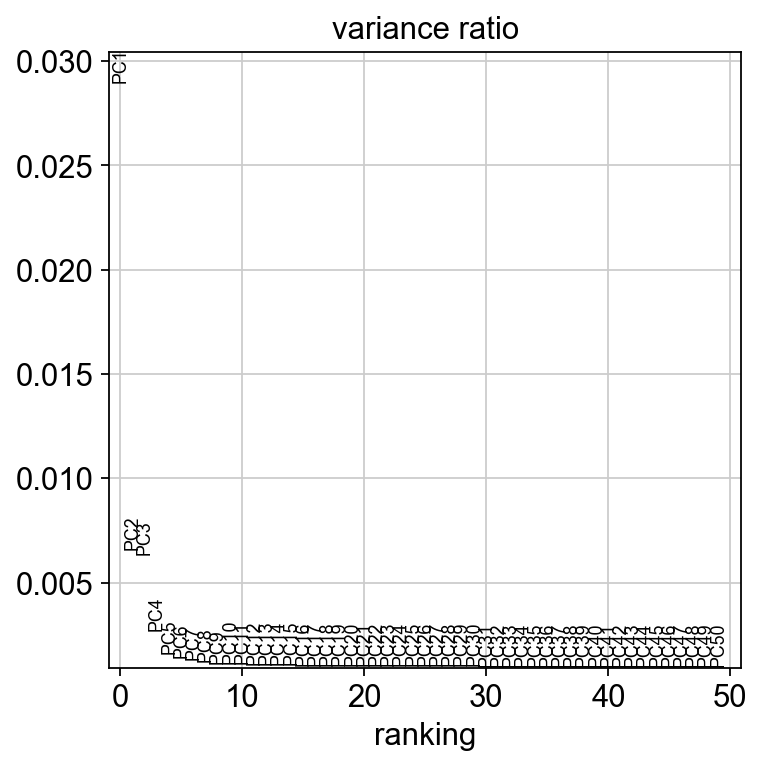

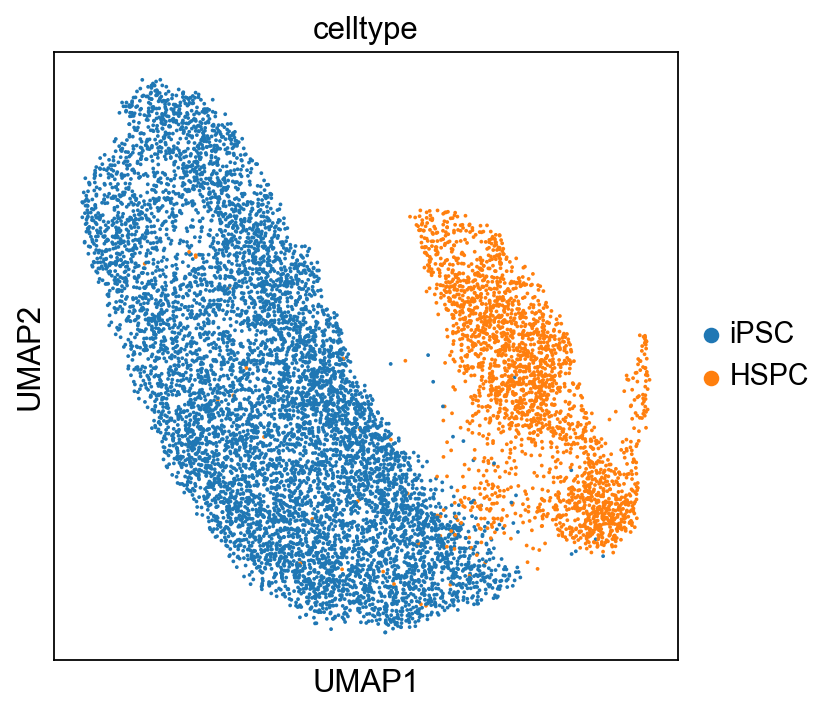

In [16]:
# PCA and KNN for UMAP plots
sc.tl.pca(adata, use_highly_variable=True)
sc.pl.pca_variance_ratio(adata,50)

sc.pp.neighbors(adata,n_neighbors=20,n_pcs=10)
sc.tl.umap(adata)
sc.pl.umap(adata, color='celltype')

In [17]:
# Quick run of InferCNVpy for Leiden clustering by CNV score
reference_key = 'predicted_diploid'
reference_cat = ['diploid']

cnv.tl.infercnv(adata,reference_key=reference_key,reference_cat=reference_cat,
                exclude_chromosomes=None,chunksize=5000,calculate_gene_values=False,
                window_size=100,step=10,dynamic_threshold=1.5)

  0%|          | 0/3 [00:00<?, ?it/s]

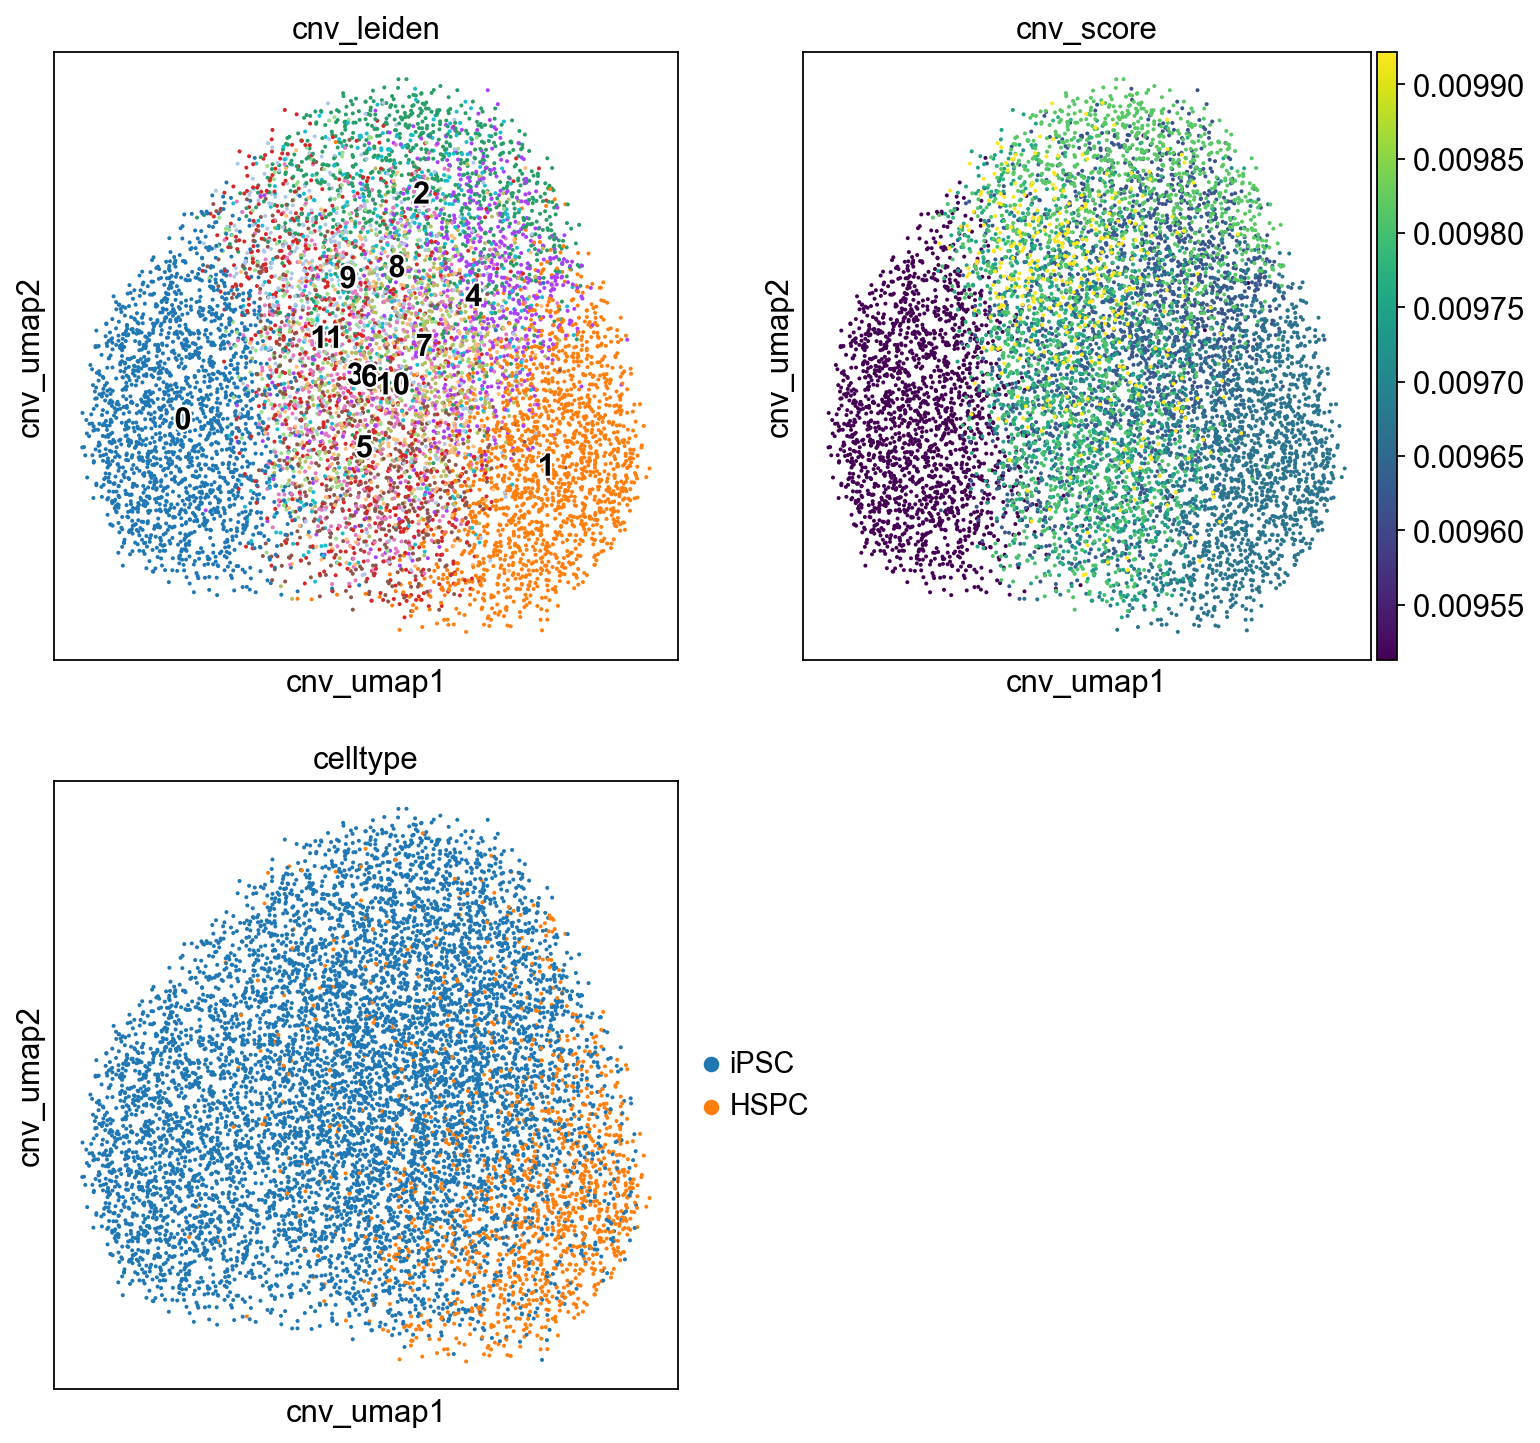

In [18]:
# Plot
def plot_aneuploid_cnv_clusters_new(adata,diploid_annotation='predicted_diploid'):
    adata_aneuploid = adata[adata.obs['predicted_diploid']=='aneuploid']

    cnv.tl.pca(adata_aneuploid)
    cnv.pp.neighbors(adata_aneuploid)
    cnv.tl.leiden(adata_aneuploid)

    sc.tl.dendrogram(adata_aneuploid, groupby='cnv_leiden')

    cnv.tl.umap(adata_aneuploid)
    cnv.tl.cnv_score(adata_aneuploid)


    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 11))
    ax4.axis("off")
    cnv.pl.umap(
        adata_aneuploid,
        color="cnv_leiden",
        legend_loc="on data",
        legend_fontoutline=2,
        ax=ax1,
        show=False,
    )
    cnv.pl.umap(adata_aneuploid, color="cnv_score", ax=ax2, show=False)
    cnv.pl.umap(adata_aneuploid, color="celltype", ax=ax3)
plot_aneuploid_cnv_clusters_new(adata,diploid_annotation='predicted_diploid')

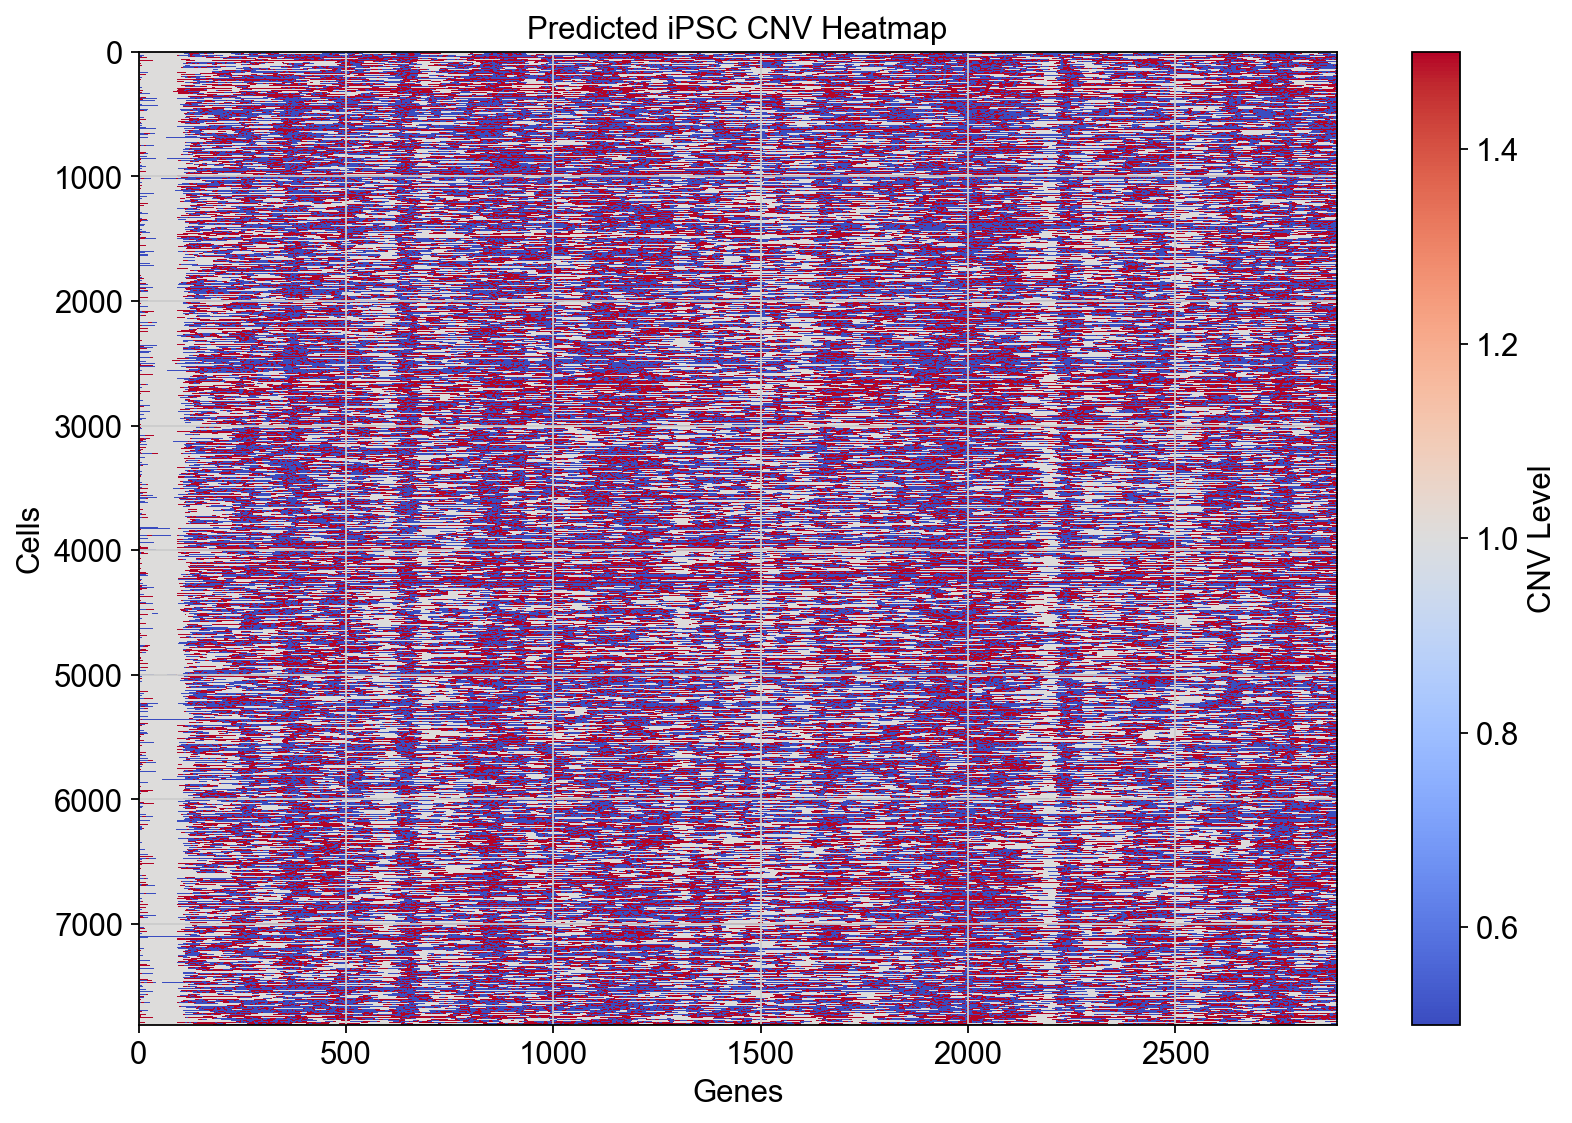

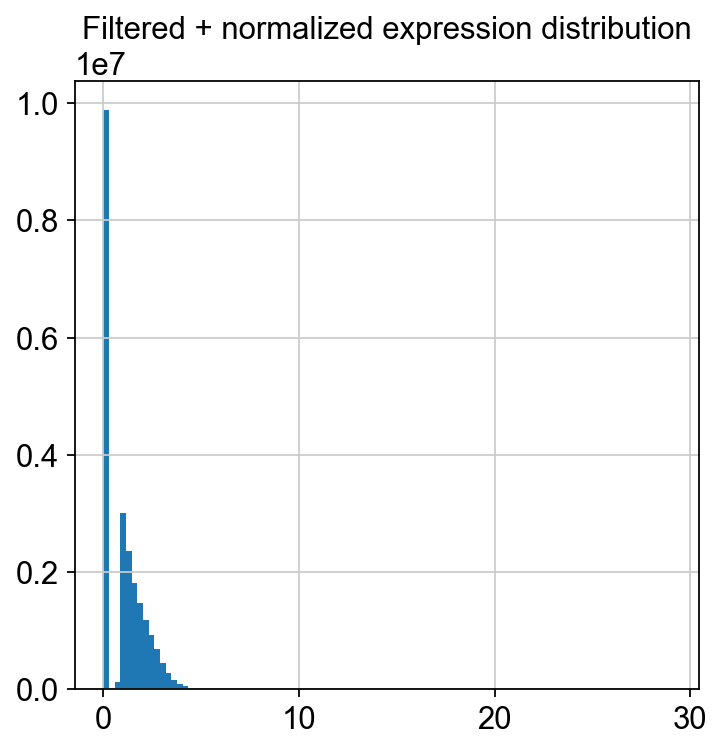

In [19]:
adata_Mono = i3_hmm_infercnv(adata,cell_type='iPSC',cell_annotation='celltype',diploid_annotation='predicted_diploid',logFC_threshold=0.5,plots=True)

In [20]:
adata_Mono.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype,predicted_diploid,gmm_cluster,hmm_cnv_score,hmm_cnv
barcode,,,,,,,,,,,,,,
AACACACAGAACGTCCAAACCAATCCG,2388,5707,630,11.039075,908,15.910286,2388,5707,0,iPSC,aneuploid,2,0.946021,chrY:20575776.0-20593154.0 (loss)
AACACACAGAACGTCCAACTTCAGTCT,2451,5962,482,8.084535,905,15.179470,2451,5962,0,iPSC,aneuploid,2,0.948443,chr19:29205320.0-46392981.0 (loss)
AACACACAGAACGTCCAAGTACGGACT,2203,5180,489,9.440154,805,15.540541,2203,5180,0,iPSC,aneuploid,2,0.857439,chrY:20575776.0-20593154.0 (loss)
AACACACAGAATCCGGTGGTGGCAACT,2909,7224,867,12.001661,847,11.724806,2909,7224,0,iPSC,aneuploid,2,1.017128,
AACACACAGAATCCGGTGTTGTGTACG,2831,7497,714,9.523810,1152,15.366146,2831,7497,0,iPSC,aneuploid,2,1.008131,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGGACACTGGTCAGTTCTCAATCGT,2466,6360,832,13.081761,995,15.644654,2466,6360,0,iPSC,aneuploid,2,0.926471,chr4:39822863.0-120066858.0 (loss)
TGTGGACACTTACACGACTGACAGCTA,2529,5737,554,9.656615,782,13.630818,2529,5737,0,iPSC,aneuploid,2,0.946713,chrY:20575776.0-20593154.0 (loss)
TGTGGACACTTGCCGTCACCAAGGATG,2116,4523,603,13.331859,501,11.076719,2116,4523,0,iPSC,aneuploid,2,0.811938,chrY:20575776.0-20593154.0 (loss)


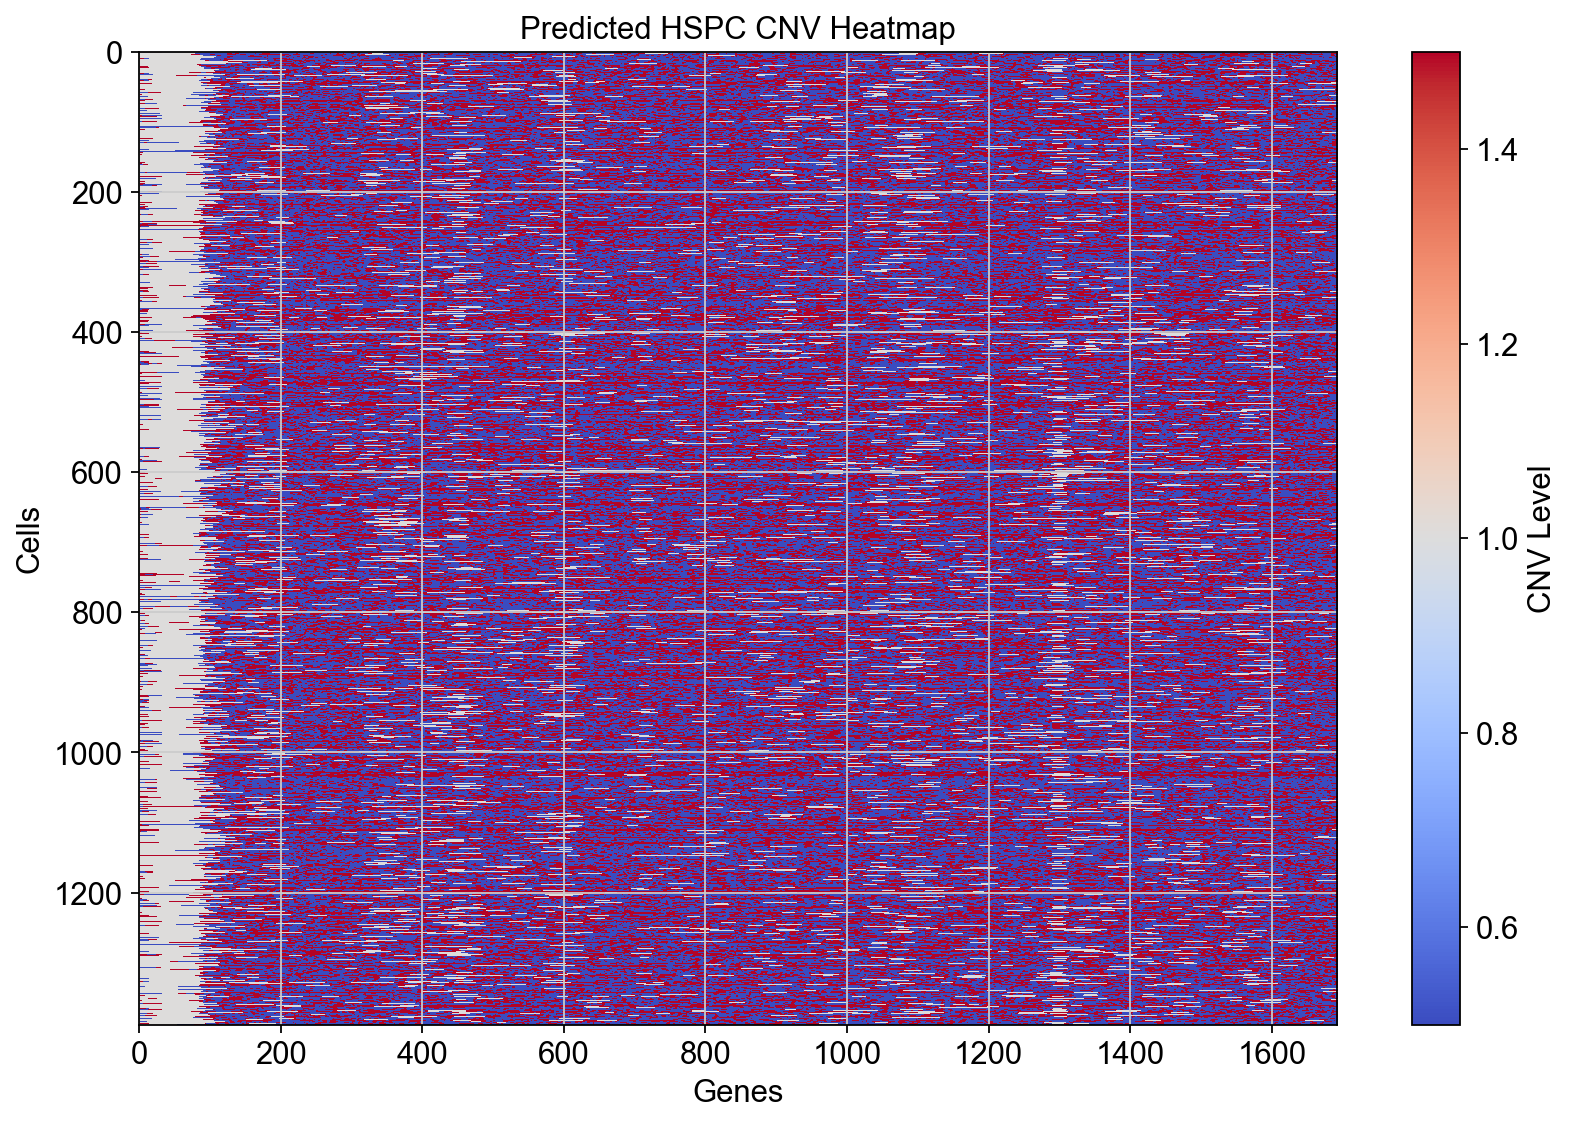

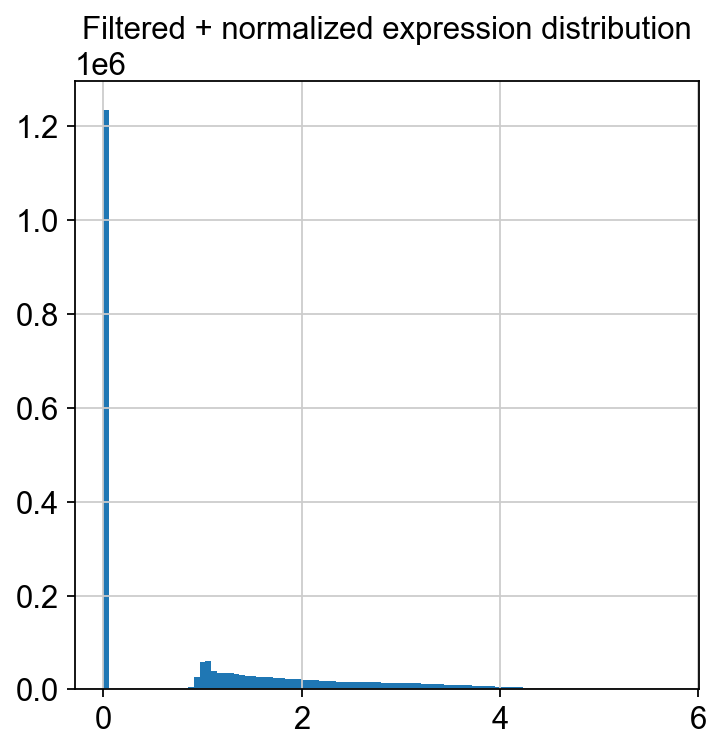

In [22]:
adata_Tcell = i3_hmm_infercnv(adata,cell_type='HSPC',cell_annotation='celltype',diploid_annotation='predicted_diploid',logFC_threshold=0.5,plots=True)

In [23]:
adata_Tcell.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype,predicted_diploid,gmm_cluster,hmm_cnv_score,hmm_cnv
barcode,,,,,,,,,,,,,,
AACACACAGAATCCGGTGCCAATACAG,1582,2992,9,0.300802,526,17.580214,1582,2992,1,HSPC,aneuploid,0,1.011525,
AACACACAGAATCCGGTGCCGTGTCAA,2427,5187,28,0.539811,819,15.789474,2427,5187,1,HSPC,aneuploid,0,1.286939,chr2:25427182.0-26897332.0 (gain)
AACACACAGACTCATCGTCCTCTTAAG,1077,1737,34,1.957398,304,17.501439,1077,1737,1,HSPC,aneuploid,0,0.744385,chr2:110637528.0-241317061.0 (loss)
AACACACAGAGACGAAGTGGTGTCGTA,1688,2676,13,0.485800,307,11.472347,1688,2676,1,HSPC,aneuploid,0,0.966017,
AACACACAGAGATACGCAGCCACATTG,1305,2151,9,0.418410,322,14.969781,1305,2151,1,HSPC,aneuploid,0,0.846927,chrX:155197007.0-155239841.0 (loss)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGGACACGCTGCGATAATCGCTCTG,1278,2301,9,0.391134,384,16.688396,1278,2301,1,HSPC,aneuploid,0,0.906915,chr1:90915298.0-175012027.0 (loss)
TGTGGACACGCTGCGATAGGCCATGTT,1196,1952,17,0.870902,328,16.803279,1196,1952,1,HSPC,aneuploid,0,0.822991,chr1:141474.0-22101360.0 (loss)
TGTGGACACTAATGGCCGTGCTTATGG,1292,2122,46,2.167766,277,13.053723,1292,2122,1,HSPC,aneuploid,0,0.842790,chrX:155197007.0-155239841.0 (loss)


In [27]:
# Get top 10 most common CNVs
top_cnvs = adata.obs['hmm_cnv'].value_counts().head(10)
print("Top 10 most common CNVs:\n")
print(top_cnvs)

print("\nFraction of iPSC vs HSPC cells for each top CNV:\n")

# For each CNV, calculate fraction of iPSC and HSPC cells
for cnv in top_cnvs.index:
    subset = adata.obs[adata.obs['hmm_cnv'] == cnv]
    total = len(subset)

    ipsc_count = (subset['celltype'] == 'iPSC').sum()
    hspc_count = (subset['celltype'] == 'HSPC').sum()

    ipsc_frac = ipsc_count / total if total else 0
    hspc_frac = hspc_count / total if total else 0

    print(f"{cnv}:")
    print(f"  iPSC: {ipsc_count} cells ({ipsc_frac:.2%})")
    print(f"  HSPC: {hspc_count} cells ({hspc_frac:.2%})\n")


Top 10 most common CNVs:

hmm_cnv
                                     4258
chrY:20575776.0-20593154.0 (loss)    1078
chrY:20575776.0-20593154.0 (gain)     704
chr1:141474.0-13219581.0 (loss)       114
chr1:141474.0-71185972.0 (loss)        96
chr1:141474.0-12679250.0 (gain)        35
chr1:141474.0-16063391.0 (loss)        33
chr1:141474.0-71185972.0 (gain)        32
chr1:141474.0-7836835.0 (gain)         31
chr1:141474.0-3585336.0 (loss)         24
Name: count, dtype: int64

Fraction of iPSC vs HSPC cells for each top CNV:

:
  iPSC: 1868 cells (43.87%)
  HSPC: 2390 cells (56.13%)

chrY:20575776.0-20593154.0 (loss):
  iPSC: 1078 cells (100.00%)
  HSPC: 0 cells (0.00%)

chrY:20575776.0-20593154.0 (gain):
  iPSC: 704 cells (100.00%)
  HSPC: 0 cells (0.00%)

chr1:141474.0-13219581.0 (loss):
  iPSC: 114 cells (100.00%)
  HSPC: 0 cells (0.00%)

chr1:141474.0-71185972.0 (loss):
  iPSC: 96 cells (100.00%)
  HSPC: 0 cells (0.00%)

chr1:141474.0-12679250.0 (gain):
  iPSC: 35 cells (100.00%)
  

In [26]:
# Print top 5 most frequent CNVs
top_cnvs = adata.obs['hmm_cnv'].value_counts().head(10)
print("Top 10 most common CNVs:")
print(top_cnvs)

Top 10 most common CNVs:
hmm_cnv
                                     4258
chrY:20575776.0-20593154.0 (loss)    1078
chrY:20575776.0-20593154.0 (gain)     704
chr1:141474.0-13219581.0 (loss)       114
chr1:141474.0-71185972.0 (loss)        96
chr1:141474.0-12679250.0 (gain)        35
chr1:141474.0-16063391.0 (loss)        33
chr1:141474.0-71185972.0 (gain)        32
chr1:141474.0-7836835.0 (gain)         31
chr1:141474.0-3585336.0 (loss)         24
Name: count, dtype: int64


In [96]:
# Because chromosome location and genomic regions are almost all wrong
# We will focus on whether we were able to detect in a cell a CNV and its type (gain or loss) correctly
assess_predicted_cnvs(adata,prediction_annotation='hmm_cnv',truth_annotation='simulated_cnvs')

Precision: 0.5733788395904437
Recall: 0.27199136535348084
Accuracy: 0.7888548683404777
F1 score: 0.3689604685212299
